In [143]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [144]:
# import csv files 

csv_file_1 = pd.read_csv('city_data.csv')

csv_file_2 = pd.read_csv('ride_data.csv')

#csv_file_1.head()


In [145]:
#csv_file_2.head()

In [146]:
# merging bpth csv files using City as the common denominator 

combined_file = pd.DataFrame.merge(csv_file_1, csv_file_2, on = 'city', how = "left")

combined_file.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


###Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)


In [147]:
print (combined_file['city'].nunique())
print (combined_file['type'].nunique())

120
3


In [148]:
AvgFare_byCity = pd.DataFrame({'Average Fare' : combined_file.groupby(['city', 'driver_count', 'type']).fare.mean()}).reset_index()

#AvgFare_byCity.head()

In [149]:
Ride_byCity = pd.DataFrame({'Total Ride Count' : combined_file.groupby(['city','driver_count','type']).ride_id.mean()}).reset_index()

#Ride_byCity.head()

In [150]:
# merging multiple dataframes & renaming column name

combined_df = pd.DataFrame.merge(AvgFare_byCity, Ride_byCity, on = ['city', 'driver_count', 'type']).reset_index()

combined_df = combined_df.rename(columns={'type' : "City type"})

#combined_df.head()

In [151]:
# Sorting dataframe by City type and re-arrange column position

combined_df = combined_df.sort_values('driver_count', ascending = False)

combined_DF = combined_df[['City type', 'city', 'driver_count', 'Average Fare', 'Total Ride Count']]


combined_DF.head()

,City type,city,driver_count,Average Fare,Total Ride Count
116,Urban,West Samuelburgh,73,21.767600,4.566740e+12
96,Urban,South Michelleport,72,24.451613,4.727560e+12
105,Urban,West Anthony,70,24.736667,4.694461e+12
43,Urban,Liumouth,69,26.150000,4.605775e+12
71,Urban,Port Angela,67,23.836842,5.203415e+12


# Bubble Plot 

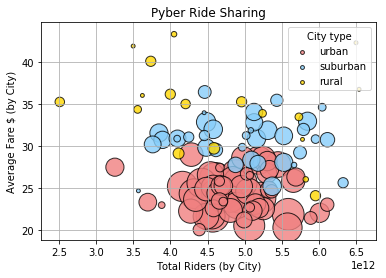

In [160]:
# for City type category 

urban = combined_DF[combined_DF["City type"]=="Urban"]
suburban = combined_DF[combined_DF["City type"]=="Suburban"]
rural = combined_DF[combined_DF["City type"]=="Rural"]

#Scatter plot frame definition 

plt.scatter(urban["Total Ride Count"], urban["Average Fare"], s= urban["driver_count"]*15, marker="o",color ="LightCoral", edgecolor ="black", alpha =0.8, label = "urban")
plt.scatter(suburban["Total Ride Count"], suburban["Average Fare"], s= suburban["driver_count"]*15, marker="o",color ="LightSkyBlue",edgecolor ="black", alpha =0.8, label = "suburban")
plt.scatter(rural["Total Ride Count"], rural["Average Fare"], s= rural["driver_count"]*15, marker="o",color ="Gold", edgecolor ="black", alpha =0.8, label = "rural")
plt.grid()

# labels definition 

plt.title("Pyber Ride Sharing")
plt.xlabel("Total Riders (by City)")
plt.ylabel("Average Fare $ (by City)")

# city type label

lgnd=plt.legend(title="City type", loc = "upper right", frameon = True )
lgnd.legendHandles[0]._sizes=[15]
lgnd.legendHandles[1]._sizes=[15]
lgnd.legendHandles[2]._sizes=[15]

plt.savefig('PYber Bubble Plot_Ride Sharing.png')                       


plt.show()



# % of Total Fares by City Type

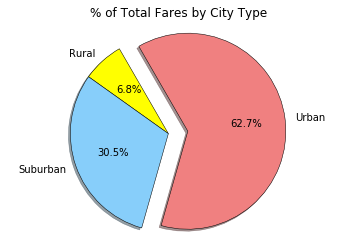

In [158]:
#group by type to be used by all pie charts
by_type = combined_file.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#total fare by city
fare_sum = by_type.sum()['fare']

#pie chart build
labels = fare_sum.index

#colors and exploe the same for all pie charts, reference here
colors = ['yellow' , 'lightskyblue', 'LightCoral']
explode = [0 , 0, .2]
plt.pie(fare_sum, startangle = 120, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})


# save charts
plt.savefig('PYber Total_Fares_by_City_Type.png')

#pie chart display
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()


# % of Total Rides by City Type

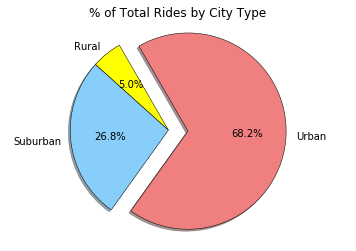

In [157]:
#group by type to be used by all pie charts
by_type = combined_file.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#total fare by city
ride_sum = by_type.sum()['ride_id']

#pie chart build
labels = ride_sum.index

#colors and exploe the same for all pie charts, reference here
colors = ['yellow' , 'lightskyblue', 'LightCoral']
explode = [0 , 0, .2]
plt.pie(ride_sum, startangle = 120, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})


# save chart
plt.savefig('PYber Total_Rides_by_City_Type.png')

#pie chart display
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()


# % of Total Drivers by CIty Type

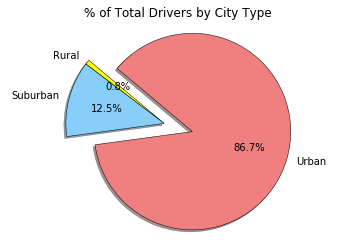

In [156]:
#group by type to be used by all pie charts
by_type = combined_file.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#total fare by city
drivercount_sum = by_type.sum()['driver_count']

#pie chart build
labels = drivercount_sum.index

#colors and exploe the same for all pie charts, reference here
colors = ['yellow' , 'lightskyblue', 'LightCoral']
explode = [0 , 0, .3]
plt.pie(drivercount_sum, startangle = 140, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})


# save chart
plt.savefig('PYber Total_Drivers_by_City_Type.png')

#pie chart display
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()

